# Neural Network แบ่งออกเป็น 3 รูปแบบ
1)sequential การนำแต่ละเลเยอร์มาเรียงต่อกันตามลำดับ

2)function API โครงข่ายซับซ้อนมากขึ้นมีการใช้เลเยอร์ร่วมก้นได้

3)model subclassing มีโครงสร้างที่ระเบียบมากขึ้น โดยเลเยอร์ต่างๆ จะอยู่ในรูปแบบของออบเจกต์ นำไปใช้ในการเรียนรู้เชิงลึก

###1. sequential API

In [ ]:
from keras import Sequential #โครงสร้าง NN
from keras.layers import Input #จัการข้อมูลที่อยู่ใน input layer
from keras.layers import Dense #จัดการข้อมู่ลที่อยู่ใน hidden layer ที่มีการเชื่อมต่อระหว่างโหนด
                               #แต่ละเลเยอร์เป็นชนิด dense (fully connected)
#สร้างโครงสร้าง NN
model = Sequential() #สร้างตัวแปรเก็บแบบจำลอง
model._name = 'NN_Sequential'
#กำหนดรายละเอียดแต่ละเลเยอร์
input_layer = Input(shape=(10,)) #กำหนดขนาดของ input layer 10 perceptro(node)
model.add(input_layer) #เพิ่มเลเยอร์เข้าไปใน NN
hidden_layer = Dense(12, activation='sigmoid',name='hidden_layer') #กำหนดขนาดของ hidden layer 12 perceptron(node)
model.add(hidden_layer) #เพิ่มเลเยอร์เข้าไปใน NN
second_hidden_layer = Dense(5, activation='relu',name='second_hidden_layer')
model.add(second_hidden_layer)
output_layer = Dense(3, activation='softmax',name='output_layer')
model.add(output_layer)
model.summary() #แสดงรายละเอียดของ NN

Model: "NN_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 12)                132       
                                                                 
 second_hidden_layer (Dense  (None, 5)                 65        
 )                                                               
                                                                 
 output_layer (Dense)        (None, 3)                 18        
                                                                 
Total params: 215 (860.00 Byte)
Trainable params: 215 (860.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


การเขียนโค้ดรูปแบบย่อ

Model: "NN_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 12)                132       
                                                                 
 hidden_layer2 (Dense)       (None, 5)                 65        
                                                                 
 output_layer (Dense)        (None, 3)                 18        
                                                                 
Total params: 215 (860.00 Byte)
Trainable params: 215 (860.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


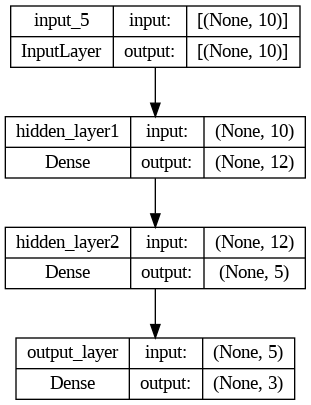

In [ ]:
from keras import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.utils import plot_model

model = Sequential()
model._name = 'NN_Sequential'
model.add(Input(shape=(10,)))
model.add(Dense(12, activation='sigmoid',name='hidden_layer1'))
model.add(Dense(5, activation='relu',name='hidden_layer2'))
model.add(Dense(3, activation='softmax',name='output_layer'))
model.summary()

plot_model(model, to_file=model._name+'.png',show_shapes=True,show_layer_names=True)
#แสดงรูปแบบของภาพ diagram แสดงการเชื่อมต่อในแต่ละ layer ค่า 132 = (10*12)+12, 65=(12*5)+5 , 18=(5*3)+3

2. function API

Model: "NN_function"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 hidden_layer1 (Dense)       (None, 4)                    16        ['input_layer[0][0]']         
                                                                                                  
 hidden_layer2 (Dense)       (None, 4)                    20        ['hidden_layer1[0][0]']       
                                                                                                  
 branch_layer (Dense)        (None, 4)                    20        ['hidden_layer2[0][0]']       
                                                                                        

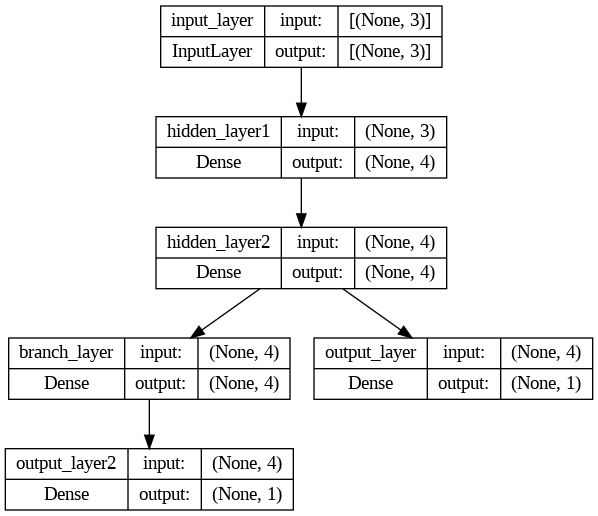

In [ ]:
from keras import Sequential,Model
from keras.layers import Input, Dense
from keras.utils import plot_model

input_layer = Input(shape=(3,),name = 'input_layer')
hidden_layer1 = Dense(4, activation='relu',name='hidden_layer1')(input_layer)
hidden_layer2 = Dense(4, activation='relu',name='hidden_layer2')(hidden_layer1)
output_layer = Dense(1, activation='sigmoid',name='output_layer')(hidden_layer2)
branch_layer = Dense(4, activation='relu',name='branch_layer')(hidden_layer2)
outpur_layer2 = Dense(1, activation='sigmoid',name='output_layer2')(branch_layer)

model = Model(inputs=input_layer, outputs=[output_layer,outpur_layer2])
model._name='NN_function'
model.summary()

plot_model(model, to_file=model._name+'.png',show_shapes=True,show_layer_names=True)

การ concatenate() เลเยอร์ ใน Function API

Model: "NN_function"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer1 (InputLayer)   [(None, 6)]                  0         []                            
                                                                                                  
 hidden_layer1 (Dense)       (None, 6)                    42        ['input_layer1[0][0]']        
                                                                                                  
 input_layer2 (InputLayer)   [(None, 4)]                  0         []                            
                                                                                                  
 hidden_layer2 (Dense)       (None, 4)                    28        ['hidden_layer1[0][0]']       
                                                                                        

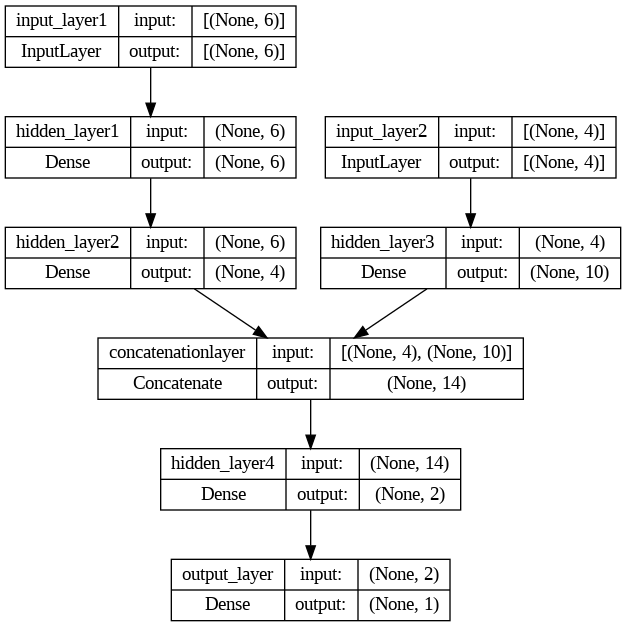

In [ ]:
from keras import Sequential,Model
from keras.layers import Input, Dense, concatenate
from keras.utils import plot_model

input_layer1 = Input(shape=(6,),name = 'input_layer1')
input_layer2 = Input(shape=(4,),name = 'input_layer2')
hidden_layer1 = Dense(6, activation='relu',name='hidden_layer1')(input_layer1)
hidden_layer2 = Dense(4, activation='relu',name='hidden_layer2')(hidden_layer1)
hidden_layer3 = Dense(10, activation='relu',name='hidden_layer3')(input_layer2)

concat_layer = concatenate([hidden_layer2,hidden_layer3],name='concatenationlayer')

hidden_layer4 = Dense(2, activation='relu',name='hidden_layer4')(concat_layer)
output_layer = Dense(1, activation='sigmoid',name='output_layer')(hidden_layer4)

model = Model(inputs=[input_layer1,input_layer2], outputs=output_layer)
model._name='NN_function'
model.summary()

plot_model(model, to_file=model._name+'.png',show_shapes=True,show_layer_names=True)



การออกแบบจำลองโมเดล กรณีการทำนายโรคเบาหวาน

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential,Model
from keras.layers import Input, Dense

#อ่านชุดข้อมูล
diabetes = pd.read_csv('diabetes.csv',header=None)
trains , tests = train_test_split(diabetes,test_size=0.2)

# ตรวจสอบคอลัมน์ที่ไม่ใช่ตัวเลขในข้อมูลการฝึกอบรมและการทดสอบ
non_numeric_cols_train = trains.select_dtypes(exclude=['number']).columns
non_numeric_cols_test = tests.select_dtypes(exclude=['number']).columns

# แปลงคอลัมน์ที่ไม่ใช่ตัวเลขเป็นตัวเลข (แทนที่ด้วยการแปลงที่เหมาะสมหากจำเป็น)
for col in non_numeric_cols_train:
    trains[col] = pd.to_numeric(trains[col], errors='coerce')
for col in non_numeric_cols_test:
    tests[col] = pd.to_numeric(tests[col], errors='coerce')

# จัดการค่าที่หายไป (NaN) หากมีการสร้างขึ้นระหว่างการแปลง
trains = trains.fillna(0)
tests = tests.fillna(0) # ใช้การแก้ไขเดียวกันกับข้อมูลการทดสอบ

#ออกแบบจำลอง
diabetes_model = Sequential()
diabetes_model._name = 'diabetes_NN_model'
diabetes_model.add(Input(shape=(8,),name='input_layer'))
diabetes_model.add(Dense(12, activation='relu',name='hidden_layer1'))
diabetes_model.add(Dense(8, activation='relu',name='hidden_layer2'))
diabetes_model.add(Dense(1, activation='sigmoid',name='output_layer'))

#คอมไพล์แบบจำลอง
diabetes_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#training set
trains_X = trains.iloc[:,:8]
trains_y = trains.iloc[:,8]

#ฝึกแบบจำลอง
diabetes_model.fit(trains_X, trains_y, epochs=100, batch_size=10)

#testing set
tests_X = tests.iloc[:,:8]
tests_y = tests.iloc[:,8]

#ประเมินแบบจำลอง
loss, accuracy = diabetes_model.evaluate(tests_X, tests_y,batch_size=10)
print('Accuracy: %.2f' %(accuracy*100))
print('Loss %2f' %loss)

#บันทึกแบบจำลอง
diabetes_model.save('diabetes_NN_model.h5')

Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 3.6835 - accuracy: 0.5919
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 1.1878 - accuracy: 0.5382
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.9158 - accuracy: 0.5626
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.5528
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.8032 - accuracy: 0.5821
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7757 - accuracy: 0.6065
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.6000
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.6000
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.6098
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.6293
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


การใช้งานแบบจำลอง

In [ ]:
from keras.models import load_model

#นำเข้าแบบจำลอง
model = load_model('diabetes_NN_model.h5')

#กำหนดข้อมูล
data = [[5,148,72,35,0,33.6,0.627,50],
        [3,153,120,30,310,48,1.57,42],
        [1,113,220,50,200,20.4,2.57,26]]

#ทำนายผล
prediction_diabetes = model.predict(data)
print('ข้อมูลที่ต้องการทำนาย --> ',data)

#แสดงผลการทำนาย
for i in range(3):
  result_str = 'เป็น' if prediction_diabetes[i] >=0.5 else 'ไม่เป็น'
  print(f'{data[i]} --> {result_str} เบาหวาน ')

1/1 [==============================] - 0s 78ms/step
ข้อมูลที่ต้องการทำนาย -->  [[5, 148, 72, 35, 0, 33.6, 0.627, 50], [3, 153, 120, 30, 310, 48, 1.57, 42], [1, 113, 220, 50, 200, 20.4, 2.57, 26]]
[5, 148, 72, 35, 0, 33.6, 0.627, 50] --> เป็น เบาหวาน 
[3, 153, 120, 30, 310, 48, 1.57, 42] --> ไม่เป็น เบาหวาน 
[1, 113, 220, 50, 200, 20.4, 2.57, 26] --> ไม่เป็น เบาหวาน 


การทำนายการเป็นโรคหลอดเลือดในสมอง(stroke)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential,Model
from keras.layers import Input, Dense

#นำเข้าข้อมูล
stroke = pd.read_csv('stroke.csv')

#drop column
new_column = stroke.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)

#drop na
new_no = new_column.dropna()

#แบ่งข้อมูล
trains , tests = train_test_split(new_no,test_size=0.2)
input_node = len(new_no.columns)
print(new_no.info())
print(trains.info())
print(tests.info())

#ออกแบบ
model = Sequential()
model.add(Input(shape=(input_node,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#training set
trains_x = trains.iloc[:,0:input_node]
trains_y = trains.iloc[:,input_node-1]

#ฝึกแบบจำลอง
model.fit(trains_x, trains_y, epochs=10, batch_size=10)

#testing set
tests_x = tests.iloc[:,0:input_node]   # เลือกทุกคอลัมน์ยกเว้นคอลัมน์สุดท้าย
tests_y = tests.iloc[:,input_node-1]     # เลือกคอลัมน์สุดท้ายเป็นตัวแปรเป้าหมาย

#ประเมินแบบจำลอง
loss, accuracy = model.evaluate(tests_x, tests_y)
print('Accuracy: %.2f' %(accuracy*100))
print('Loss %2f' %loss)

#บันทึกแบบจำลอง
model.save('stroke_NN_model.h5')

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   int64  
 2   heart_disease      4909 non-null   int64  
 3   avg_glucose_level  4909 non-null   float64
 4   bmi                4909 non-null   float64
 5   stroke             4909 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 268.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 3927 entries, 5009 to 3499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3927 non-null   float64
 1   hypertension       3927 non-null   int64  
 2   heart_disease      3927 non-null   int64  
 3   avg_glucose_level  3927 non-null   float64
 4   bmi                3927 non-null   float64
 5   stroke       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


การนำแบบจำลองมาใช้งาน

In [ ]:
import numpy as np
from keras.models import load_model

#นำเข้าแบบจำลอง
model = load_model('stroke_NN_model.h5')

#data to predict
data = [[48.0,0,1,91.96,24.9,0],
        [25.0,1,0,56.9,22.9,0],
        [30.0,0,1,120,28.1,1]]

#ทำนายผล
prediction_stroke = model.predict(data)

#show prediction result
for i in range(3):
  result_str = 'เป็น' if prediction_stroke[i] >=0.5 else 'ไม่เป็น'
  print(f'{data[i]} --> {result_str} โรคหลอดเลือดในสมอง ')

1/1 [==============================] - 0s 103ms/step
[48.0, 0, 1, 91.96, 24.9, 0] --> ไม่เป็น โรคหลอดเลือดในสมอง 
[25.0, 1, 0, 56.9, 22.9, 0] --> ไม่เป็น โรคหลอดเลือดในสมอง 
[30.0, 0, 1, 120, 28.1, 1] --> ไม่เป็น โรคหลอดเลือดในสมอง 


###การทำนายตัวเลขจากภาพลายมือด้วยโครงข่ายประสาทเทียม

In [ ]:
#การนำชุดข้อมลเข้า
from keras.datasets import mnist

#โหลดชุดข้อมูลเข้าสู่่ตัวแปร
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#ตรวจสอบชนิด จำนวน และขนาดข้อมูล
print(type(x_train))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#ผลที่ได้เป็นข้อมูลอาเรย์ที่มีขนาด 3 มิติ มีจำนวน 60,000 ภาพ แต่ละภาพสูง 28 พิกเซล กว้าง 28 พิกเซล

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


การแสดงชุดข้อมูล

In [ ]:
for i in range(28):
  for j in range(28):
    print(x_train[0][i][j],end='\t')
  print('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	

0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	

0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	

0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0

แสดงภาพตัวเลข ใช้คำสั้ง imshow()

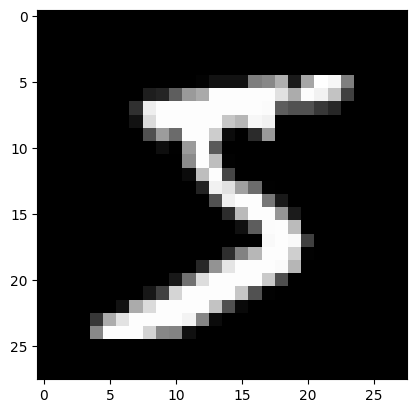

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap='gray')
plt.show()

แสดงภาพตัวเลข 0-9 โดยการสุ่ม

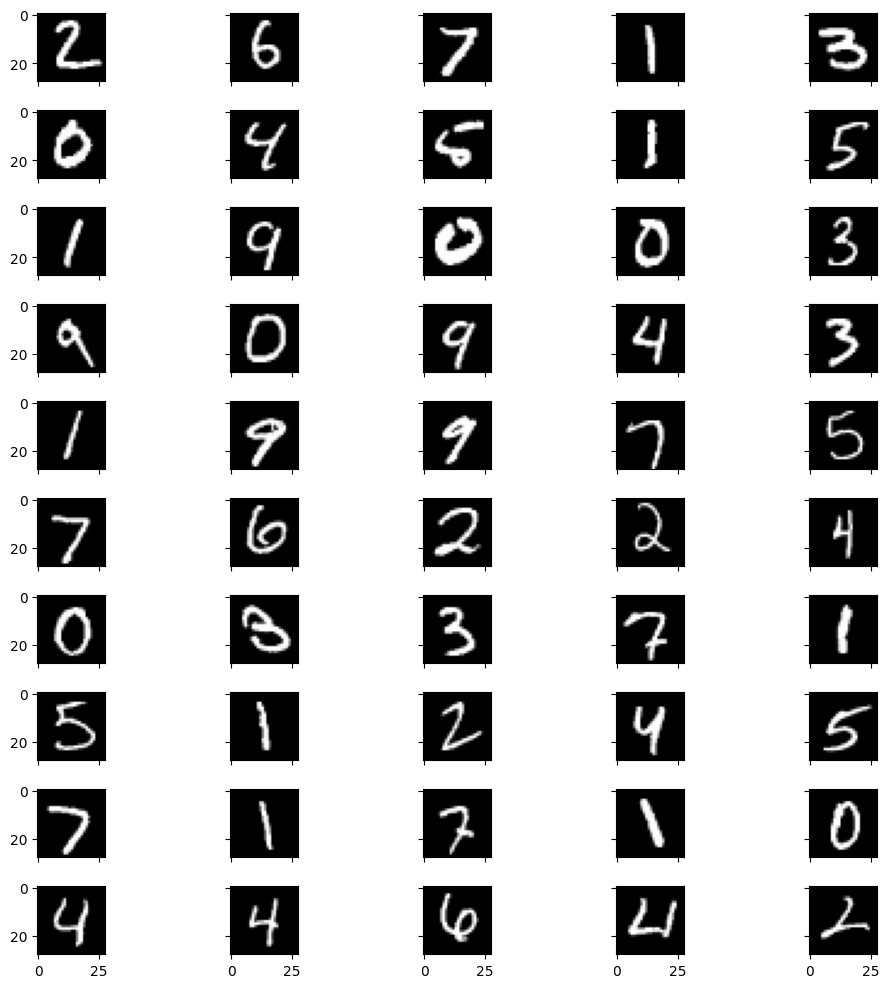

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

digit = {}
for i in range(10):
  digit[i] = np.where(y_train==i)[0][:5]
  ''' สร้างตัวแปร dictionary ชื่อ digits เก็บข้อมูลภาพลายมือตัวเลขแต่ละตัว โดยกำหนด key เป็น 0-9 value เป็นภาพลายมือ
  ตัวเลขนั้น
  '''
fig, ax = plt.subplots(10,5,sharex='col',sharey='row',figsize=(10,10))
fig.tight_layout()
for i in range(10):
  for j in range(5):
    ax[i,j].imshow(x_test[digit[i][j]],cmap='gray')
    '''
    แสดง 10 แถวๆ ละ 5 รูปภาพ ตามข้อมุลในตัวแปร โดยแสดงภาพแต่ละภาพให้มีขนาด 10x10 พิกเซล'''

การเตรียมข้อมูลให้เหมาะกับแบบจำลอง

1.แปลงข้อมูลภาพจาก 2 มิติ เป็น 1 มิต ใช้คำสั่ง reshape() เรียกว่าเป็นการ flattening

2.เปลี่ยนสเกลตัวเลขจากช่วงระหว่าง 0-255 เป็น 0.0-1.0 เรียกขั้นตอนนี้ว่า scaling ทำได้โดยการหารค่าข้อมูลแต่ละพิกเซลด้วย 255.0

In [ ]:
#การทำ flattening
import numpy as np
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
print(x_train.shape)
print(type(x_train[1][0]))
print('ค่าของข้อมูลอยู่ในช่วง',np.min(x_train[1]),'ถึง',np.max(x_train[1]))

#การทำ scaling
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0
print(type(x_train_scaled[1][0]))
print('ค่าของข้อมูลอยู่ในช่วง',np.min(x_train_scaled[1]),'ถึง',np.max(x_train_scaled[1]))
'''
แปลงจาก 3 มิติ เป็น 2 มิติ (60,000,784)
แปลงจาก 0-255 เป็น 0-1
'''

(60000, 784)
<class 'numpy.uint8'>
ค่าของข้อมูลอยู่ในช่วง 0 ถึง 255
<class 'numpy.float64'>
ค่าของข้อมูลอยู่ในช่วง 0.0 ถึง 1.0


การออกแบบ Neural Network

Model: "NN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 512)               401920    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


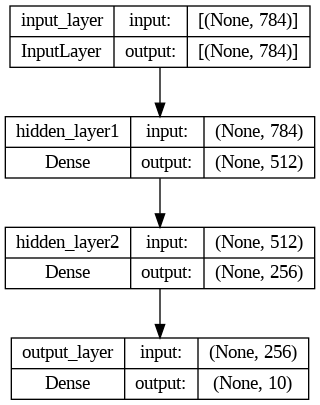

In [ ]:
from keras import Sequential,Model
from keras.layers import Input, Dense
from keras.utils import plot_model

#ออกแบบ
model = Sequential()
model._name = 'NN_model'
model.add(Input(shape=(28*28),name = 'input_layer'))
model.add(Dense(512, activation='relu',name='hidden_layer1'))
model.add(Dense(256, activation='relu',name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()
#วาด diagram
plot_model(model, to_file=model._name+'.png',show_shapes=True,show_layer_names=True)


In [ ]:
#การคอมไพล์แบบจำลอง
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#ฝึกแบบจำลอง
model.fit(x_train_scaled, y_train, epochs=32, batch_size=10)

Epoch 1/32
6000/6000 [==============================] - 51s 8ms/step - loss: 0.1884 - accuracy: 0.9423
Epoch 2/32
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0878 - accuracy: 0.9729
Epoch 3/32
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 4/32
6000/6000 [==============================] - 51s 8ms/step - loss: 0.0540 - accuracy: 0.9837
Epoch 5/32
6000/6000 [==============================] - 50s 8ms/step - loss: 0.0445 - accuracy: 0.9871
Epoch 6/32
6000/6000 [==============================] - 49s 8ms/step - loss: 0.0402 - accuracy: 0.9886
Epoch 7/32
6000/6000 [==============================] - 50s 8ms/step - loss: 0.0361 - accuracy: 0.9899
Epoch 8/32
6000/6000 [==============================] - 49s 8ms/step - loss: 0.0309 - accuracy: 0.9917
Epoch 9/32
6000/6000 [==============================] - 51s 8ms/step - loss: 0.0316 - accuracy: 0.9919
Epoch 10/32
6000/6000 [==============================] - 49s 8ms/step - l

การประเมินผลแบบจำลอง

In [ ]:
loss,accuracy = model.evaluate(x_test_scaled, y_test,batch_size=32)
print('Accuracy: %.2f' %(accuracy*100),end='\n')
print('Loss %2f' %loss)

#การบันทึกแบบจำลอง
model.save('mnist_NN_model.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.9813
Accuracy: 98.13
Loss 0.283814


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


การใช้งานแบบจำลอง

1/1 [==============================] - 0s 272ms/step
ผลจากการทำนาย :  4


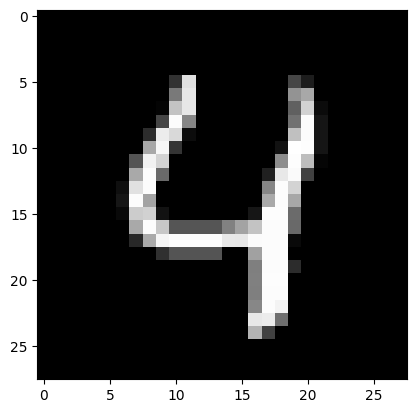

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt

#ข้อมูลที่ต้องการทดสอบ
testimage = x_test[4]
plt.imshow(testimage.reshape(28,28),cmap='gray')
load_model = load_model('mnist_NN_model.h5')
prediction = load_model.predict(testimage.reshape(-1,28*28))
print('ผลจากการทำนาย : ',prediction.argmax()) #แสดงผลการทำนายที่ได้จะมาจากค่าความน่าจะเป็นที่มีค่ามากสุด ใช้ฟังก์ชั่น argmax()